# Prepare environment

In [18]:
!pip install mmdet==2.3.0 requests
!pip install torch==1.5.1+cpu torchvision==0.6.1+cpu -f https://download.pytorch.org/whl/torch_stable.html
!pip install mmcv-full==1.0.5+torch1.5.0+cpu -f https://openmmlab.oss-accelerate.aliyuncs.com/mmcv/dist/index.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
Looking in links: https://openmmlab.oss-accelerate.aliyuncs.com/mmcv/dist/index.html
  Using cached https://openmmlab.oss-accelerate.aliyuncs.com/mmcv/dist/1.0.5/torch1.5.0/cpu/mmcv_full-1.0.5%2Btorch1.5.0%2Bcpu-cp36-cp36m-manylinux1_x86_64.whl
  Found existing installation: mmcv-full 1.0.5
    Uninstalling mmcv-full-1.0.5:
      Successfully uninstalled mmcv-full-1.0.5


# Download prerequisites

In [13]:
conf_url = 'https://raw.githubusercontent.com/iiLaurens/CascadeTabNet/mmdet2x/Config/cascade_mask_rcnn_hrnetv2p_w32_20e.py'

with open('cascade_mask_rcnn_hrnetv2p_w32_20e.py', 'wb') as f:
  f.write(requests.get(conf_url).content)

checkpoint_url = 'https://github.com/iiLaurens/CascadeTabNet/releases/download/v1.0.0/ICDAR.19.Track.B2.Modern.table.structure.recognition.v2.pth'

with open('ICDAR.19.Track.B2.Modern.table.structure.recognition.v2.pth', 'wb') as f:
  f.write(requests.get(checkpoint_url).content)

demo_img = 'https://github.com/iiLaurens/CascadeTabNet/raw/mmdet2x/Demo/demo.png'

with open('demo.png', 'wb') as f:
  f.write(requests.get(demo_img).content)

# Run inference on demo image

/usr/local/lib/python3.6/dist-packages/mmdet/apis/inference.py:109: UserWarning: We set use_torchvision=True in CPU mode.
  warnings.warn('We set use_torchvision=True in CPU mode.')
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2973: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


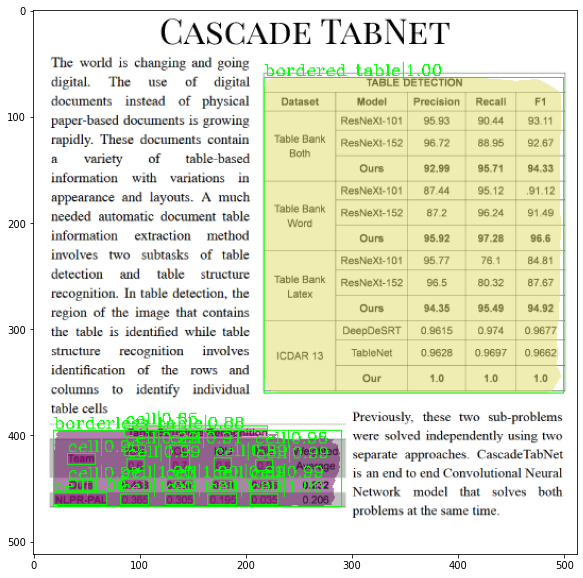

In [17]:
from mmdet.apis import init_detector, inference_detector, show_result_pyplot
import mmcv
# Load model
config_file = 'cascade_mask_rcnn_hrnetv2p_w32_20e.py'
checkpoint_file = 'ICDAR.19.Track.B2.Modern.table.structure.recognition.v2.pth'
model = init_detector(config_file, checkpoint_file, device='cpu')

# Test a single image 
img = "demo.png"

# Run Inference
result = inference_detector(model, img)

# Visualization results
show_result_pyplot(model, img, result, score_thr=0.85)